In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [10]:
image_path = '../output_vidoes/cropped_image.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

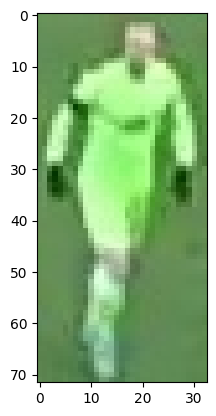

In [11]:
plt.imshow(image)
plt.show()

# take top half

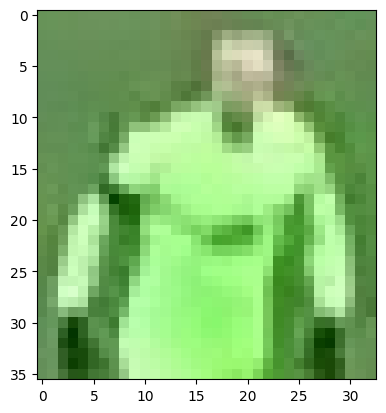

In [12]:
top_half = image[0:int(image.shape[0]/2), :]
plt.imshow(top_half)
plt.show()

# cluster

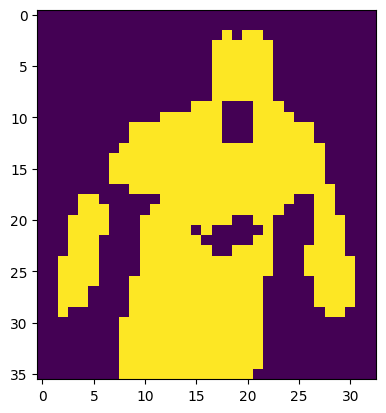

In [15]:
image_2d = top_half.reshape(-1,3)

#k means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)

#lables
labels = kmeans.labels_

clustered_image = labels.reshape(top_half.shape[0], top_half.shape[1])

plt.imshow(clustered_image)
plt.show()

In [17]:
corner_clusters = [clustered_image[0,0], clustered_image[0,-1], clustered_image[-1,0], clustered_image[-1,-1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

0


In [18]:
player_cluster = 1 - non_player_cluster
print(player_cluster)

1


In [19]:
kmeans.cluster_centers_[player_cluster]

array([172.36659878, 238.55804481, 147.37678208])